In [1]:
import math
import numpy as np
import os
import pandas as pd

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA

In [2]:
def get_lines_from_file(filename):
    f=open(filename)
    lines=[x.strip() for x in f]
    f.close()
    return lines

In [3]:
rgbWords  = ['yellow','blue','purple', 'orange','red','green']
shapeWords  = ['cylinder','cube', 'triangle','triangular','rectangular']
objWords = ['cylinder', 'apple','carrot', 'lime','lemon','orange', 'banana','cube', 'triangle', 'corn','cucumber', 'half', 'cabbage', 'ear', 'tomato', 'potato', 'cob','eggplant']

In [4]:
def get_deviations(filename,words):
    lines=get_lines_from_file("/Users/adithyabandi/_True_True_90_25_rgb_0_min_max.txt")
    tokens=[]
    mins=[]
    maxs=[]
    reqmins=[]
    reqmaxs=[]
    for line in lines:
        temp=line.split("_")
        tokens.append(temp[1])
        mins.append(temp[3])
        maxs.append(temp[5])
    for i in range(len(tokens)):
        if tokens[i] in words:
            reqmins.append(mins[i])
            reqmaxs.append(maxs[i])
    return reqmins,reqmaxs    

In [5]:
def get_report(filename):
    lines=get_lines_from_file(filename)
    j=0
    types=[]
    estops=[]
    sorts=[]
    pre_thres=[]
    rec_thres=[]
    split=[]
    acc=[]
    pre=[]
    rec=[]
    f1=[]
    min_means=[]
    min_medians=[]
    min_std_devs=[]
    max_means=[]
    max_medians=[]
    max_std_devs=[]
    i=0
    while i<len(lines):
        mins_agg=[]
        maxs_agg=[]
        for counter in range(4):
            mins_str=lines[i].split("]")[0].split("[")[1].split(",")
            mins=[float(per_min) for per_min in mins_str]
            for mini in mins:
                mins_agg.append(mini)
            i+=1
            maxs_str=lines[i].split("]")[0].split("[")[1].split(",")
            maxs=[float(per_max) for per_max in maxs_str]
            for maxi in maxs:
                maxs_agg.append(maxi)
            i+=1
            g=lines[i]
            temp=g.split("-")
            sorts.append(temp[0])
            types.append(temp[1])
            estops.append(temp[2])
            pre_thres.append(temp[3])
            rec_thres.append(temp[4])
            split.append(temp[5])
            i+=2
            acc.append(float(lines[i])*100)
            i+=1
            f1.append(float(lines[i])*100)
            i+=1
            pre.append(float(lines[i])*100)
            i+=1
            rec.append(float(lines[i])*100)
            i+=1
            j+=1
            i+=1
        for counter in range(4):
            min_means.append(np.mean(mins_agg))
            min_medians.append(np.median(mins_agg))
            min_std_devs.append(np.std(mins_agg))
            max_means.append(np.mean(maxs_agg))
            max_medians.append(np.median(maxs_agg))
            max_std_devs.append(np.std(maxs_agg))
        
    Results=pd.DataFrame({'type':types,'early_stop':estops,
                      'pre_threshold':pre_thres,
                       'rec_threshold':rec_thres,'instances_sorted':sorts,
                          'precision':pre,'recall':rec,
                        'f1_score':f1,
                       'split':split,'accuracy':acc,
                       "mean_min_dissim_":min_means,"median_min_dissim_":min_medians,
                        "std_dev_min_dissim_":min_std_devs,
                        "mean_max_dissim_":max_means,
                        "median_max_dissim_":max_medians,
                        "std_dev_max_dissim_":max_std_devs})
    return Results

In [6]:
Results=get_report("/Users/adithyabandi/AllExecutionV.csv")
#Results

In [7]:
Results=Results[['instances_sorted','early_stop','type','split','pre_threshold', 'rec_threshold', 
                'f1_score','precision','recall','accuracy', 'mean_max_dissim_', 'mean_min_dissim_', 
                'median_max_dissim_','median_min_dissim_','std_dev_max_dissim_', 'std_dev_min_dissim_']]

In [8]:
#Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold']).mean().sort_values(by=["f1_score"],ascending=False)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
def display_results(Results,feature_type,early_stop,instance_sort):
    object_Results=Results[Results.type==feature_type]
    object_Results=object_Results[object_Results.early_stop==early_stop]
    object_Results=object_Results[object_Results.instances_sorted==instance_sort]
    object_Results_grouped=object_Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold'])
    display(pd.DataFrame(object_Results_grouped.mean().reset_index()))#sort_values(by=["f1_score"],ascending=False))
    object_Results_grouped_df=object_Results_grouped.aggregate(np.mean)
    object_Results_grouped_df=object_Results_grouped_df.reset_index()
    data_pivoted = object_Results_grouped_df[(object_Results_grouped_df.early_stop==early_stop) & (object_Results_grouped_df.instances_sorted==instance_sort)].pivot("pre_threshold", "rec_threshold", "f1_score")
    ax = sns.heatmap(data_pivoted)
    plt.show()

With instances sorted as True
With Early Stop set as True
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,True,True,rgb,25,25,89.417659,92.791667,90.972222,90.944444,97.716150,41.441235,98.540010,49.334932,3.345962,13.987076
1,True,True,rgb,25,50,87.237103,87.548611,90.208333,89.416667,97.716150,41.441235,98.540010,49.334932,3.345962,13.987076
2,True,True,rgb,25,75,77.236111,75.451389,81.319444,78.250000,98.099258,55.467865,99.032808,52.986728,3.411892,16.826571
3,True,True,rgb,25,90,71.032738,69.243056,76.527778,71.694444,98.410915,67.013057,99.032808,70.791909,3.211087,16.851067
4,True,True,rgb,50,25,87.256944,89.854167,88.819444,91.652778,97.716150,41.441235,98.540010,49.334932,3.345962,13.987076
5,True,True,rgb,50,50,89.128968,91.354167,90.277778,91.861111,97.716150,41.441235,98.540010,49.334932,3.345962,13.987076
6,True,True,rgb,50,75,75.664683,74.194444,80.555556,76.340278,98.099258,55.467865,99.032808,52.986728,3.411892,16.826571
7,True,True,rgb,50,90,69.759921,67.659722,76.388889,70.291667,98.410915,67.013057,99.032808,70.791909,3.211087,16.851067
8,True,True,rgb,75,25,84.785714,80.479167,97.222222,84.312500,97.716150,71.229439,98.540010,79.318025,3.345962,22.859643
9,True,True,rgb,75,50,85.104167,80.173611,98.125000,83.923611,97.716150,71.229439,98.540010,79.318025,3.345962,22.859643


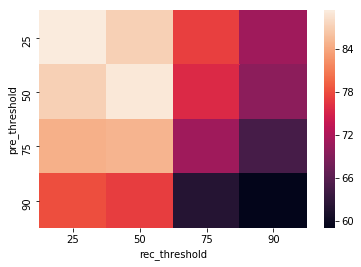

With instances sorted as True
With Early Stop set as False
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,True,False,rgb,25,25,87.327381,88.055556,89.861111,89.694444,97.716150,41.441235,98.540010,49.334932,3.345962,13.987076
1,True,False,rgb,25,50,88.123016,89.305556,90.694444,91.451389,97.716150,41.441235,98.540010,49.334932,3.345962,13.987076
2,True,False,rgb,25,75,92.917659,93.187500,95.347222,93.965278,97.019725,45.653515,98.134889,51.646597,4.276003,17.714005
3,True,False,rgb,25,90,90.263889,90.312500,92.916667,91.368056,96.065144,58.612041,98.134889,63.736285,6.963220,17.861923
4,True,False,rgb,50,25,89.209325,91.645833,90.208333,91.659722,97.716150,41.441235,98.540010,49.334932,3.345962,13.987076
5,True,False,rgb,50,50,88.795635,92.333333,88.680556,91.270833,97.716150,41.441235,98.540010,49.334932,3.345962,13.987076
6,True,False,rgb,50,75,92.323413,93.506944,93.958333,94.111111,97.019725,45.653515,98.134889,51.646597,4.276003,17.714005
7,True,False,rgb,50,90,90.533730,90.486111,93.958333,92.666667,96.065144,58.612041,98.134889,63.736285,6.963220,17.861923
8,True,False,rgb,75,25,91.620040,91.729167,94.722222,91.513889,97.716150,50.391052,98.540010,52.120706,3.345962,16.224222
9,True,False,rgb,75,50,89.349206,88.125000,94.444444,91.055556,97.716150,50.391052,98.540010,52.120706,3.345962,16.224222


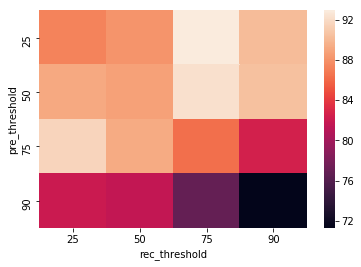

With instances sorted as False
With Early Stop set as True
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,False,True,rgb,25,25,84.250992,87.437500,84.583333,88.430556,97.779562,40.939257,98.568980,48.164057,3.403780,14.074684
1,False,True,rgb,25,50,89.390873,92.736111,90.486111,92.250000,97.345591,43.163545,98.540010,50.911810,3.944960,14.720668
2,False,True,rgb,25,75,60.242063,58.340278,65.694444,59.354167,91.083976,47.910958,95.135550,48.320587,13.770668,16.202698
3,False,True,rgb,25,90,47.807540,44.895833,56.944444,47.111111,91.715749,63.567814,95.221994,58.705019,8.933021,16.988567
4,False,True,rgb,50,25,89.808532,91.368056,92.430556,91.715278,97.716150,41.441235,98.540010,49.334932,3.345962,13.987076
5,False,True,rgb,50,50,87.045635,89.305556,89.166667,90.743056,96.888124,42.579594,98.134889,49.334932,5.064435,15.745769
6,False,True,rgb,50,75,74.620040,73.923611,77.708333,74.590278,93.521393,52.360158,96.257673,52.120706,8.275425,17.185224
7,False,True,rgb,50,90,73.944444,69.083333,85.972222,73.777778,83.616916,58.969454,89.656223,63.512664,16.926676,18.682246
8,False,True,rgb,75,25,81.203373,77.763889,92.361111,79.000000,91.908519,55.312888,92.177764,53.700937,7.905696,17.908684
9,False,True,rgb,75,50,82.607143,78.944444,91.041667,83.875000,89.152474,54.261970,91.948432,55.944202,11.732903,17.276132


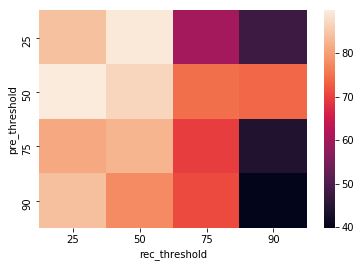

With instances sorted as False
With Early Stop set as False
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,False,False,rgb,25,25,89.363095,91.736111,90.277778,92.402778,97.716150,41.441235,98.540010,49.334932,3.345962,13.987076
1,False,False,rgb,25,50,88.116071,90.666667,88.541667,91.979167,97.716150,41.441235,98.540010,49.334932,3.345962,13.987076
2,False,False,rgb,25,75,87.597222,88.263889,90.138889,90.666667,95.924876,43.393994,97.094540,50.725693,6.148862,14.623659
3,False,False,rgb,25,90,79.110119,78.909722,81.319444,79.416667,94.896824,59.226861,96.257673,57.095466,4.779852,15.650813
4,False,False,rgb,50,25,89.767857,92.736111,90.625000,92.500000,97.716150,41.441235,98.540010,49.334932,3.345962,13.987076
5,False,False,rgb,50,50,88.140873,90.618056,89.166667,90.944444,97.716150,41.441235,98.540010,49.334932,3.345962,13.987076
6,False,False,rgb,50,75,89.178571,89.493056,92.500000,91.895833,97.540101,46.715296,98.540010,51.793093,3.083311,12.664956
7,False,False,rgb,50,90,82.174603,82.034722,84.652778,82.069444,92.777310,53.819526,95.508879,52.986728,7.376197,15.348648
8,False,False,rgb,75,25,91.920635,93.263889,93.888889,93.298611,96.990583,43.079475,98.105920,49.740935,4.118587,13.154111
9,False,False,rgb,75,50,94.080357,93.743056,97.222222,94.256944,96.500092,45.276222,96.459451,51.865755,4.353250,13.768528


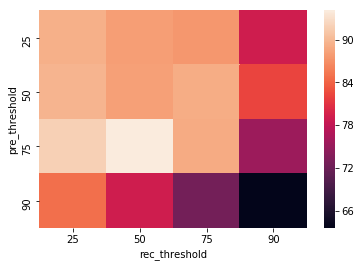

With instances sorted as True
With Early Stop set as True
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,True,True,shape,25,25,76.166667,86.333333,71.666667,84.941667,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
1,True,True,shape,25,50,73.733333,82.583333,69.750000,85.016667,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
2,True,True,shape,25,75,74.545238,84.041667,69.833333,84.158333,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
3,True,True,shape,25,90,68.364286,69.350000,77.916667,70.325000,97.920306,74.605975,99.555331,81.236222,5.969347,18.266971
4,True,True,shape,50,25,74.983333,83.583333,70.833333,84.933333,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
5,True,True,shape,50,50,73.600000,81.416667,69.833333,82.275000,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
6,True,True,shape,50,75,77.045238,87.291667,72.500000,85.350000,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
7,True,True,shape,50,90,67.544048,69.916667,75.750000,72.008333,97.920306,74.605975,99.555331,81.236222,5.969347,18.266971
8,True,True,shape,75,25,74.616667,85.083333,69.916667,81.983333,97.920306,52.893810,99.555331,56.838557,5.969347,11.664460
9,True,True,shape,75,50,76.816667,86.666667,72.416667,85.600000,97.920306,52.893810,99.555331,56.838557,5.969347,11.664460


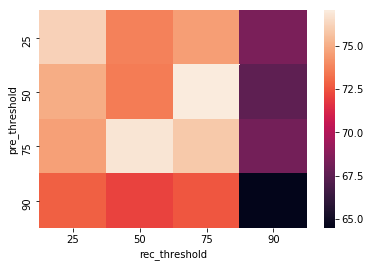

With instances sorted as True
With Early Stop set as False
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,True,False,shape,25,25,72.183333,82.500000,67.250000,82.858333,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
1,True,False,shape,25,50,75.450000,84.500000,71.333333,84.183333,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
2,True,False,shape,25,75,73.600000,83.750000,68.833333,84.641667,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
3,True,False,shape,25,90,75.366667,85.333333,70.750000,83.883333,97.920306,54.666077,99.555331,56.838557,5.969347,10.460563
4,True,False,shape,50,25,75.483333,86.000000,70.666667,84.300000,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
5,True,False,shape,50,50,73.900000,83.833333,69.333333,84.433333,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
6,True,False,shape,50,75,73.866667,85.083333,69.083333,80.891667,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
7,True,False,shape,50,90,73.011905,84.958333,67.750000,82.250000,97.920306,54.666077,99.555331,56.838557,5.969347,10.460563
8,True,False,shape,75,25,74.050000,85.583333,68.583333,84.466667,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
9,True,False,shape,75,50,77.700000,89.000000,72.250000,85.858333,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093


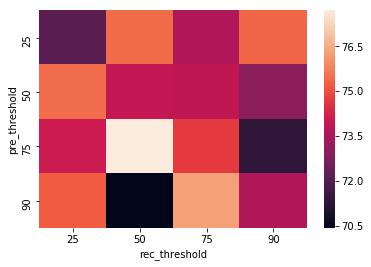

With instances sorted as False
With Early Stop set as True
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,False,True,shape,25,25,73.366667,82.666667,69.416667,84.058333,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
1,False,True,shape,25,50,74.250000,84.000000,69.916667,83.350000,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
2,False,True,shape,25,75,72.675000,77.891667,75.000000,77.133333,95.033941,57.960873,95.866548,57.652428,7.622863,11.129949
3,False,True,shape,25,90,63.753571,63.358333,72.750000,69.075000,91.633761,63.461456,91.948432,58.600647,8.612912,12.709280
4,False,True,shape,50,25,73.100000,83.083333,68.416667,80.908333,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
5,False,True,shape,50,50,74.816667,85.916667,69.583333,84.616667,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
6,False,True,shape,50,75,74.300000,87.333333,68.166667,83.933333,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
7,False,True,shape,50,90,64.667857,64.766667,75.416667,66.750000,91.072304,61.685843,91.145992,58.600647,7.760719,13.618746
8,False,True,shape,75,25,71.505952,78.441667,70.666667,80.025000,96.307424,53.426914,94.997106,56.838557,6.595535,11.474031
9,False,True,shape,75,50,74.683333,85.333333,69.916667,81.650000,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093


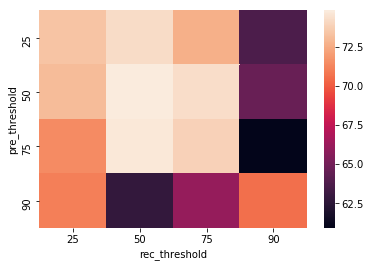

With instances sorted as False
With Early Stop set as False
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,False,False,shape,25,25,75.366667,87.250000,70.000000,84.250000,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
1,False,False,shape,25,50,76.816667,86.666667,72.083333,84.991667,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
2,False,False,shape,25,75,77.250000,87.083333,72.666667,85.691667,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
3,False,False,shape,25,90,74.898810,84.800000,70.750000,83.600000,97.541594,52.823940,97.037061,56.838557,6.008474,10.817540
4,False,False,shape,50,25,71.116667,81.333333,66.250000,83.025000,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
5,False,False,shape,50,50,75.000000,84.250000,71.250000,84.950000,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
6,False,False,shape,50,75,76.033333,83.916667,72.500000,86.341667,97.755423,52.606927,97.906502,56.838557,5.967451,8.660814
7,False,False,shape,50,90,73.345238,82.375000,70.750000,82.183333,96.779132,54.542661,97.906502,56.838557,4.976035,12.864573
8,False,False,shape,75,25,73.340476,82.250000,69.333333,84.241667,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093
9,False,False,shape,75,50,79.383333,88.833333,75.166667,86.425000,97.920306,50.754080,99.555331,55.658825,5.969347,9.319093


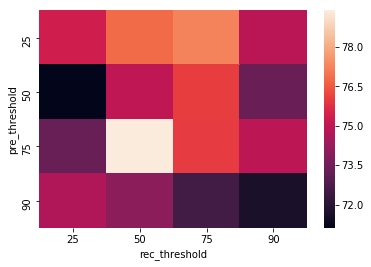

With instances sorted as True
With Early Stop set as True
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,True,True,object,25,25,66.950149,76.848958,62.682292,80.960938,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
1,True,True,object,25,50,65.793899,76.015625,61.119792,79.580729,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
2,True,True,object,25,75,64.992560,73.528646,61.614583,79.651042,100.113362,50.951433,99.555331,52.193260,4.122685,14.982710
3,True,True,object,25,90,64.063616,74.023438,60.859375,77.247396,100.113362,54.857691,99.555331,52.986728,4.122685,19.566042
4,True,True,object,50,25,66.593750,77.317708,61.692708,79.518229,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
5,True,True,object,50,50,63.573661,74.752604,58.593750,78.846354,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
6,True,True,object,50,75,64.658854,73.531250,61.328125,79.802083,100.113362,50.951433,99.555331,52.193260,4.122685,14.982710
7,True,True,object,50,90,64.679688,73.041667,62.473958,77.609375,100.113362,54.857691,99.555331,52.986728,4.122685,19.566042
8,True,True,object,75,25,66.450149,76.302083,61.979167,80.546875,100.113362,48.472768,99.555331,51.023617,4.122685,11.686273
9,True,True,object,75,50,65.873512,75.898438,61.197917,80.734375,100.113362,48.472768,99.555331,51.023617,4.122685,11.686273


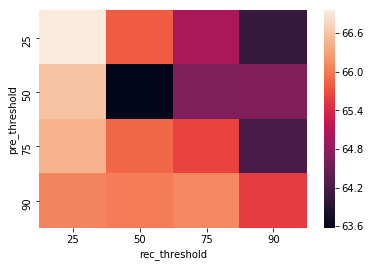

With instances sorted as True
With Early Stop set as False
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,True,False,object,25,25,65.468750,75.781250,60.625000,80.963542,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
1,True,False,object,25,50,65.765625,76.093750,61.145833,80.677083,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
2,True,False,object,25,75,66.415179,76.289062,62.031250,80.981771,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
3,True,False,object,25,90,64.934524,76.041667,60.026042,78.638021,100.113362,48.332103,99.555331,51.499500,4.122685,10.840919
4,True,False,object,50,25,65.997024,76.536458,61.250000,79.296875,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
5,True,False,object,50,50,66.729167,77.291667,61.770833,80.291667,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
6,True,False,object,50,75,65.064732,76.041667,60.312500,79.994792,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
7,True,False,object,50,90,67.031994,77.695312,62.395833,79.229167,100.113362,48.332103,99.555331,51.499500,4.122685,10.840919
8,True,False,object,75,25,66.296875,77.552083,61.119792,80.531250,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
9,True,False,object,75,50,62.757440,73.828125,57.890625,77.625000,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312


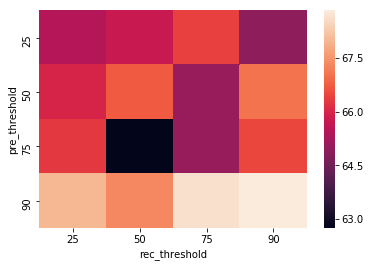

With instances sorted as False
With Early Stop set as True
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,False,True,object,25,25,66.564732,77.031250,61.901042,81.018229,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
1,False,True,object,25,50,64.392857,73.932292,60.130208,80.205729,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
2,False,True,object,25,75,62.998140,71.656250,60.625000,78.361979,99.552498,49.374998,99.468201,52.084321,4.848817,12.307078
3,False,True,object,25,90,66.713170,74.083333,66.119792,76.700521,96.187859,53.485045,97.989985,54.338176,8.177173,14.754202
4,False,True,object,50,25,65.601190,76.119792,60.807292,79.809896,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
5,False,True,object,50,50,63.398065,73.828125,59.088542,78.257812,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
6,False,True,object,50,75,64.433780,73.445312,61.718750,78.656250,98.783575,48.558768,99.381070,51.499500,6.670403,10.855988
7,False,True,object,50,90,68.872768,76.218750,67.968750,77.505208,96.840211,53.293357,98.945806,54.302900,7.461134,13.888462
8,False,True,object,75,25,64.086310,73.424479,60.312500,79.796875,99.747102,48.343912,99.555331,51.499500,4.454317,10.782741
9,False,True,object,75,50,64.696429,74.726562,60.078125,79.635417,99.501672,48.581761,99.555331,52.193260,5.028667,10.552880


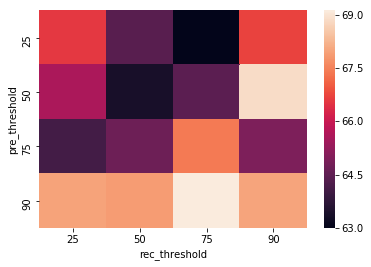

With instances sorted as False
With Early Stop set as False
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,False,False,object,25,25,64.264137,74.804688,59.453125,79.390625,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
1,False,False,object,25,50,64.615327,75.664062,59.791667,79.007812,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
2,False,False,object,25,75,66.474702,75.794271,62.291667,82.250000,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
3,False,False,object,25,90,66.432292,76.927083,61.692708,80.531250,100.013034,48.987548,99.555331,52.662442,4.330755,10.524155
4,False,False,object,50,25,66.698661,75.976562,62.682292,81.671875,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
5,False,False,object,50,50,66.637649,76.197917,62.604167,80.580729,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
6,False,False,object,50,75,66.274554,76.445312,61.770833,80.367188,100.113362,47.880198,99.555331,51.023617,4.122685,10.139181
7,False,False,object,50,90,67.232887,77.460938,62.682292,79.927083,99.893200,49.143997,99.555331,52.193260,4.035324,10.145645
8,False,False,object,75,25,64.679315,74.687500,60.312500,78.789062,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312
9,False,False,object,75,50,65.766369,76.028646,61.406250,80.338542,100.113362,47.838715,99.555331,51.023617,4.122685,10.115312


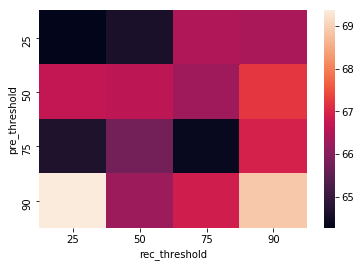

In [10]:
feature_types=["rgb","shape","object"]
early_stops=["True","False"]
instance_sorts=["True","False"]
All_Results=pd.DataFrame(Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold']).mean().reset_index())
All_Results.to_csv("/Users/adithyabandi/Results.csv")
display()
for feature_type in feature_types:
    for instance_sort in instance_sorts:
        for early_stop in early_stops:
            print("With instances sorted as",instance_sort)
            print("With Early Stop set as",early_stop)
            print(feature_type,"results:")
            display_results(Results,feature_type,early_stop,instance_sort)